In [122]:
import pandas as pd

#The datetime module supplies classes for manipulating dates and times.
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df1 =pd.read_csv('JanSales25.csv')
df2 =pd.read_csv('FebSales25.csv')
df3 =pd.read_csv('MarchSales25.csv')
df4 =pd.read_csv('AprilSales25.csv')
df5 =pd.read_csv('MaySales25.csv')




In [124]:
#Appending All Dateframes together
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df

,Account_C_Number_TradingAccount,Order_Number,Item_Code_with_Name,Quantity Ordered,Sales Line Amount,YYYY-MM-DD
0,C10231737,S037148393,DRK565 - Danone Hayat Mineral Still Water-24x5...,840,£2763.60,2025-01-14
1,C90968356,S037161047,DRN328 - Ballygowan Still Water Pet-24x500ml,65,£454.35,2025-01-02
2,C91131549,S037218610,DRN566 - Radnor Fruits Orange Still Tetra Pak ...,60,£377.40,2025-01-09
3,C91131549,S037364097,DRN566 - Radnor Fruits Orange Still Tetra Pak ...,60,£377.40,2025-01-27
4,C30108666,S037082119,DRN845 - iPRO Student Berry Mix 12x300ml,50,£302.00,2025-01-03
...,...,...,...,...,...,...
121050,C90274338,S038218262,DRK698 - Pepsi Max Cans-(GB)-24x330ml,-3,-£28.47,2025-05-01
121051,C91253211,S038232243,DRK698 - Pepsi Max Cans-(GB)-24x330ml,-3,-£23.37,2025-05-02
121052,C91253211,S038232243,DRK512 - Vimto Fizzy Cans-24x330ml,-4,-£35.16,2025-05-02
121053,C91253211,S038232243,DRN715 - Pepsi Cans (GB) 24x330ml,-4,-£33.96,2025-05-02


In [125]:
#Splitting column using Delimiter
split_cols = df['Item_Code_with_Name'].str.split(' - ', n=1, expand=True)
df['Code'] = split_cols[0]
df['Item'] = split_cols[1]

#Dropping/Removing the column after splitting 
df.drop(columns='Item_Code_with_Name', inplace=True)

df

,Account_C_Number_TradingAccount,Order_Number,Quantity Ordered,Sales Line Amount,YYYY-MM-DD,Code,Item
0,C10231737,S037148393,840,£2763.60,2025-01-14,DRK565,Danone Hayat Mineral Still Water-24x500ml
1,C90968356,S037161047,65,£454.35,2025-01-02,DRN328,Ballygowan Still Water Pet-24x500ml
2,C91131549,S037218610,60,£377.40,2025-01-09,DRN566,Radnor Fruits Orange Still Tetra Pak 24x200ml
3,C91131549,S037364097,60,£377.40,2025-01-27,DRN566,Radnor Fruits Orange Still Tetra Pak 24x200ml
4,C30108666,S037082119,50,£302.00,2025-01-03,DRN845,iPRO Student Berry Mix 12x300ml
...,...,...,...,...,...,...,...
121050,C90274338,S038218262,-3,-£28.47,2025-05-01,DRK698,Pepsi Max Cans-(GB)-24x330ml
121051,C91253211,S038232243,-3,-£23.37,2025-05-02,DRK698,Pepsi Max Cans-(GB)-24x330ml
121052,C91253211,S038232243,-4,-£35.16,2025-05-02,DRK512,Vimto Fizzy Cans-24x330ml
121053,C91253211,S038232243,-4,-£33.96,2025-05-02,DRN715,Pepsi Cans (GB) 24x330ml


In [126]:
# Remove currency symbols and commas
df['Sales Line Amount'] = df['Sales Line Amount'].replace('[\£$,]', '', regex=True)

# Convert to float
df['Sales Line Amount'] = pd.to_numeric(df['Sales Line Amount'], errors='coerce')


In [127]:
df.columns = ['C_Number','SO_Number', 'Order_Qty','Sales_amount','Invoice_Date','Item_Code','Item_Name']

df

,C_Number,SO_Number,Order_Qty,Sales_amount,Invoice_Date,Item_Code,Item_Name
0,C10231737,S037148393,840,2763.60,2025-01-14,DRK565,Danone Hayat Mineral Still Water-24x500ml
1,C90968356,S037161047,65,454.35,2025-01-02,DRN328,Ballygowan Still Water Pet-24x500ml
2,C91131549,S037218610,60,377.40,2025-01-09,DRN566,Radnor Fruits Orange Still Tetra Pak 24x200ml
3,C91131549,S037364097,60,377.40,2025-01-27,DRN566,Radnor Fruits Orange Still Tetra Pak 24x200ml
4,C30108666,S037082119,50,302.00,2025-01-03,DRN845,iPRO Student Berry Mix 12x300ml
...,...,...,...,...,...,...,...
121050,C90274338,S038218262,-3,-28.47,2025-05-01,DRK698,Pepsi Max Cans-(GB)-24x330ml
121051,C91253211,S038232243,-3,-23.37,2025-05-02,DRK698,Pepsi Max Cans-(GB)-24x330ml
121052,C91253211,S038232243,-4,-35.16,2025-05-02,DRK512,Vimto Fizzy Cans-24x330ml
121053,C91253211,S038232243,-4,-33.96,2025-05-02,DRN715,Pepsi Cans (GB) 24x330ml


In [128]:

#Converting date column to datetime format
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

# Reference date (e.g., last invoice date + 1 day)
snapshot_date = df['Invoice_Date'].max() + pd.Timedelta(days=1)

snapshot_date

Timestamp('2025-05-30 00:00:00')

In [129]:
# RFM table
rfm = df.groupby('C_Number').agg({
    'Invoice_Date': lambda x: (snapshot_date - x.max()).days,
    'SO_Number': 'nunique',
    'Sales_amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [130]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [131]:
# Combine scores as strings
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

# Numeric score
rfm['RFM_Score'] = (
    rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)
)


In [132]:
def segment_customer(score):
    if score >= 13:
        return 'Top Customer'
    elif score >= 10:
        return 'Loyal Customer'
    elif score >= 7:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Customer_Type'] = rfm['RFM_Score'].apply(segment_customer)


In [133]:
print(rfm.columns.tolist())


['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Customer_Type']


In [134]:
print(rfm[['R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Customer_Type']].head())


          R_Score F_Score M_Score RFM_Segment  RFM_Score Customer_Type
C_Number                                                              
C10046684       1       2       2         122          5       At Risk
C10049537       4       5       5         455         14  Top Customer
C10049672       4       5       5         455         14  Top Customer
C10064659       2       1       1         211          4       At Risk
C10073417       5       5       5         555         15  Top Customer


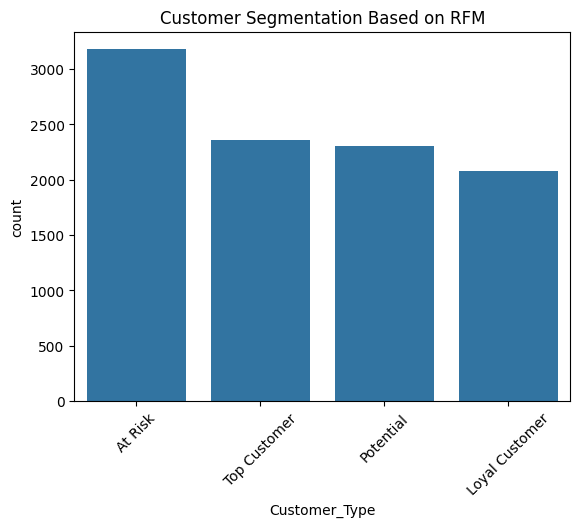

In [136]:
# Bar plot of customer types
sns.countplot(x='Customer_Type', data=rfm, order=rfm['Customer_Type'].value_counts().index)
plt.title('Customer Segmentation Based on RFM')
plt.xticks(rotation=45)
plt.show()


In [138]:
from sklearn.preprocessing import StandardScaler

# Keep only the RFM columns
rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)


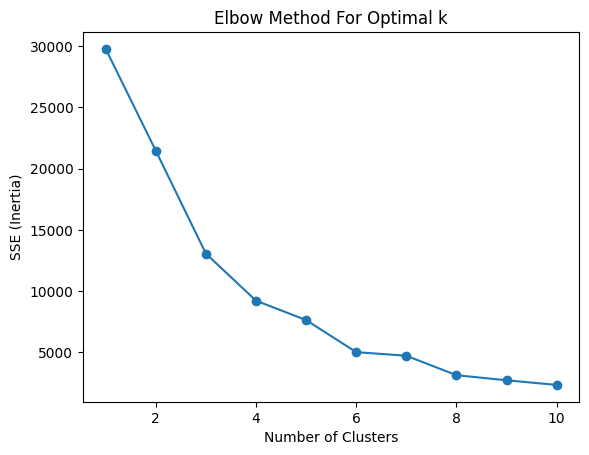

In [140]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [142]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [149]:
cluster_labels = {
    0: 'High-Value Loyal',
    1: 'Churned',
    2: 'Occasional Buyers',
    3: 'New Customers'
}

rfm['Segment_Label'] = rfm['Cluster'].map(cluster_labels)
print(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Label']].head(50))


           Recency  Frequency  Monetary  Cluster     Segment_Label
C_Number                                                          
C10046684      120          2     22.98        0  High-Value Loyal
C10049537       11         11    423.94        1           Churned
C10049672        9         13    472.03        1           Churned
C10064659       62          1      8.49        0  High-Value Loyal
C10073417        2         14    395.72        1           Churned
C10080895      128          1     46.26        0  High-Value Loyal
C10081058       17          1     32.45        1           Churned
C10081211       90          1     16.98        0  High-Value Loyal
C10083906       63          2     24.87        0  High-Value Loyal
C10086552      115          1     37.56        0  High-Value Loyal
C10089103       60          1     20.97        1           Churned
C10096418        8          3     57.96        1           Churned
C10097385        7         19    597.54        1           Chu